In [1]:
import graph_nets as gn

from graph_nets import blocks
from graph_nets import graphs
from graph_nets import modules
from graph_nets import utils_np
from graph_nets import utils_tf

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import sonnet as snt
import tensorflow as tf

- All graph network modules take instances of GraphsTuple as input, and return instances of GraphsTuple as output.
- A GraphsTuple has attributes:

  - n_node (shape=[num_graphs]): Number of nodes in each graph in the batch.
  - n_edge (shape=[num_graphs]): Number of edges in each graph in the batch.
  - globals (shape=[num_graphs] + global_feature_dimensions): Global features for each graph in the batch.
  - nodes (shape=[total_num_nodes] + node_feature_dimensions): Node features for each node in the batch of graphs.
  - edges (shape=[total_num_edges] + edge_feature_dimensions): Edge features for each edge in the batch of graphs.
  - senders(shape=[total_num_edges]): Indices of the nodes in nodes, which indicate the source node of each directed edge in edges.
  - receivers (shape=[total_num_edges]): Indices of the nodes in nodes, which indicate the destination node of each directed edge in edges.

- GraphTuple.replace creates a copy of the GraphTuple by replacing some of them by the values provided as keyword arguments



**graphs.GraphsTuple** we can define a list whose elements are dicts, with the following keys, that contain each graph's data:

- "globals": Each graph has a single float-valued feature vector.
- "nodes": Each graph has a set of nodes with float-valued feature vectors.
- "edges": Each graph has a set of edges with float-valued feature vectors.
- "senders": Each edge connects a sender node, represented by an int-valued node index, to a receiver node.
- "receivers": Each edge connects a sender node to a receiver node, represented by an int-valued node index.

In [2]:
# Global features for graph 0.
globals_0 = [1., 2., 3.]

# Node features for graph 0.
nodes_0 = [[10., 20., 30.],  # Node 0
           [11., 21., 31.],  # Node 1
           [12., 22., 32.],  # Node 2
           [13., 23., 33.],  # Node 3
           [14., 24., 34.]]  # Node 4

# Edge features for graph 0.
edges_0 = [[100., 200.],  # Edge 0
           [101., 201.],  # Edge 1
           [102., 202.],  # Edge 2
           [103., 203.],  # Edge 3
           [104., 204.],  # Edge 4
           [105., 205.]]  # Edge 5

# The sender and receiver nodes associated with each edge for graph 0.
senders_0 = [0,  # Index of the sender node for edge 0
             1,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             2,  # Index of the sender node for edge 3
             2,  # Index of the sender node for edge 4
             3]  # Index of the sender node for edge 5
receivers_0 = [1,  # Index of the receiver node for edge 0
               2,  # Index of the receiver node for edge 1
               3,  # Index of the receiver node for edge 2
               0,  # Index of the receiver node for edge 3
               3,  # Index of the receiver node for edge 4
               4]  # Index of the receiver node for edge 5

# Global features for graph 1.
globals_1 = [1001., 1002., 1003.]

# Node features for graph 1.
nodes_1 = [[1010., 1020., 1030.],  # Node 0
           [1011., 1021., 1031.]]  # Node 1

# Edge features for graph 1.
edges_1 = [[1100., 1200.],  # Edge 0
           [1101., 1201.],  # Edge 1
           [1102., 1202.],  # Edge 2
           [1103., 1203.]]  # Edge 3

# The sender and receiver nodes associated with each edge for graph 1.
senders_1 = [0,  # Index of the sender node for edge 0
             0,  # Index of the sender node for edge 1
             1,  # Index of the sender node for edge 2
             1]  # Index of the sender node for edge 3
receivers_1 = [0,  # Index of the receiver node for edge 0
               1,  # Index of the receiver node for edge 1
               0,  # Index of the receiver node for edge 2
               0]  # Index of the receiver node for edge 3

data_dict_0 = {
    "globals": globals_0,
    "nodes": nodes_0,
    "edges": edges_0,
    "senders": senders_0,
    "receivers": receivers_0
}

data_dict_1 = {
    "globals": globals_1,
    "nodes": nodes_1,
    "edges": edges_1,
    "senders": senders_1,
    "receivers": receivers_1
}

In [3]:
data_dict_list = [data_dict_0, data_dict_1]
graphs_tuple = utils_np.data_dicts_to_graphs_tuple(data_dict_list)

## i dati dei diversi grafi vengono concatenati 
## la lunghezza di n_node e n_edge è uguale al numero di grafi presenti
## e contengono il numero di nodi e il numero di archi di ogni grafo
## viene aggiunto un offset ai senders e ai receivers che corrisponde al numero 
## di nodi e di achi del grafo precedente

In [4]:
graphs_tuple

GraphsTuple(nodes=array([[  10.,   20.,   30.],
       [  11.,   21.,   31.],
       [  12.,   22.,   32.],
       [  13.,   23.,   33.],
       [  14.,   24.,   34.],
       [1010., 1020., 1030.],
       [1011., 1021., 1031.]]), edges=array([[ 100.,  200.],
       [ 101.,  201.],
       [ 102.,  202.],
       [ 103.,  203.],
       [ 104.,  204.],
       [ 105.,  205.],
       [1100., 1200.],
       [1101., 1201.],
       [1102., 1202.],
       [1103., 1203.]]), receivers=array([1, 2, 3, 0, 3, 4, 5, 6, 5, 5]), senders=array([0, 1, 1, 2, 2, 3, 5, 5, 6, 6]), globals=array([[1.000e+00, 2.000e+00, 3.000e+00],
       [1.001e+03, 1.002e+03, 1.003e+03]]), n_node=array([5, 2]), n_edge=array([6, 4]))

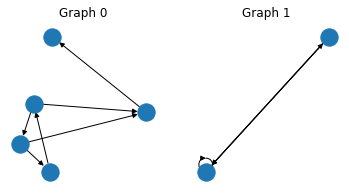

In [5]:
#da graph_tuple a lista di networkx graphs
graphs_nx = utils_np.graphs_tuple_to_networkxs(graphs_tuple)

_, axs = plt.subplots(ncols=2, figsize=(6, 3))
for iax, (graph_nx, ax) in enumerate(zip(graphs_nx, axs)):
      nx.draw(graph_nx, ax=ax)
      ax.set_title("Graph {}".format(iax))

In [6]:
graphs.ALL_FIELDS

('nodes', 'edges', 'receivers', 'senders', 'globals', 'n_node', 'n_edge')

In [7]:
def print_graphs_tuple(graphs_tuple):
    print("Shapes of `GraphsTuple`'s fields:")
    print(graphs_tuple.map(lambda x: x if x is None else x.shape, fields=graphs.ALL_FIELDS))
    print("\nData contained in `GraphsTuple`'s fields:")
    print("globals:\n{}".format(graphs_tuple.globals))
    print("nodes:\n{}".format(graphs_tuple.nodes))
    print("edges:\n{}".format(graphs_tuple.edges))
    print("senders:\n{}".format(graphs_tuple.senders))
    print("receivers:\n{}".format(graphs_tuple.receivers))
    print("n_node:\n{}".format(graphs_tuple.n_node))
    print("n_edge:\n{}".format(graphs_tuple.n_edge))

print_graphs_tuple(graphs_tuple)

Shapes of `GraphsTuple`'s fields:
GraphsTuple(nodes=(7, 3), edges=(10, 2), receivers=(10,), senders=(10,), globals=(2, 3), n_node=(2,), n_edge=(2,))

Data contained in `GraphsTuple`'s fields:
globals:
[[1.000e+00 2.000e+00 3.000e+00]
 [1.001e+03 1.002e+03 1.003e+03]]
nodes:
[[  10.   20.   30.]
 [  11.   21.   31.]
 [  12.   22.   32.]
 [  13.   23.   33.]
 [  14.   24.   34.]
 [1010. 1020. 1030.]
 [1011. 1021. 1031.]]
edges:
[[ 100.  200.]
 [ 101.  201.]
 [ 102.  202.]
 [ 103.  203.]
 [ 104.  204.]
 [ 105.  205.]
 [1100. 1200.]
 [1101. 1201.]
 [1102. 1202.]
 [1103. 1203.]]
senders:
[0 1 1 2 2 3 5 5 6 6]
receivers:
[1 2 3 0 3 4 5 6 5 5]
n_node:
[5 2]
n_edge:
[6 4]


In [8]:
## da graph tuple a dicts
recovered_data_dict_list = utils_np.graphs_tuple_to_data_dicts(graphs_tuple)

In [9]:
recovered_data_dict_list

[{'nodes': array([[10., 20., 30.],
         [11., 21., 31.],
         [12., 22., 32.],
         [13., 23., 33.],
         [14., 24., 34.]]),
  'edges': array([[100., 200.],
         [101., 201.],
         [102., 202.],
         [103., 203.],
         [104., 204.],
         [105., 205.]]),
  'receivers': array([1, 2, 3, 0, 3, 4]),
  'senders': array([0, 1, 1, 2, 2, 3]),
  'globals': array([1., 2., 3.]),
  'n_node': 5,
  'n_edge': 6},
 {'nodes': array([[1010., 1020., 1030.],
         [1011., 1021., 1031.]]),
  'edges': array([[1100., 1200.],
         [1101., 1201.],
         [1102., 1202.],
         [1103., 1203.]]),
  'receivers': array([0, 1, 0, 0]),
  'senders': array([0, 0, 1, 1]),
  'globals': array([1001., 1002., 1003.]),
  'n_node': 2,
  'n_edge': 4}]

In [10]:
#################### Grafi senza features #############################
# Number of nodes
n_node = 3

# Three edges connecting the nodes in a cycle
senders = [0, 1, 2]  # Indices of nodes sending the edges
receivers = [1, 2, 0]  # Indices of nodes receiving the edges

data_dict = {
    "n_node": n_node,
    "senders": senders,
    "receivers": receivers,
}
graphs_tuple = utils_np.data_dicts_to_graphs_tuple([data_dict])


###################### Grafi senza edges #######################

# Node features.
nodes = [[10.],  # Node 0
         [11.],  # Node 1
         [12.]]  # Node 2

data_dict = {
    "nodes": nodes,
}

graphs_tuple = utils_np.data_dicts_to_graphs_tuple([data_dict])


In [12]:
graphs_tuple

GraphsTuple(nodes=array([[10.],
       [11.],
       [12.]]), edges=None, receivers=None, senders=None, globals=None, n_node=array([3]), n_edge=array([0]))

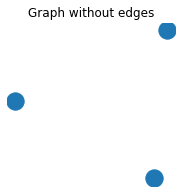

In [11]:
# We can visualize the graph using networkx.
graphs_nx = utils_np.graphs_tuple_to_networkxs(graphs_tuple)
ax = plt.figure(figsize=(3, 3)).gca()
nx.draw(graphs_nx[0], ax=ax)
_ = ax.set_title("Graph without edges")

#### Da networkx a graph tuple

Shapes of `GraphsTuple`'s fields:
GraphsTuple(nodes=(4, 2), edges=(3, 2), receivers=(3,), senders=(3,), globals=(1, 3), n_node=(1,), n_edge=(1,))

Data contained in `GraphsTuple`'s fields:
globals:
[[0.6 0.7 0.8]]
nodes:
[[0.3 1.3]
 [0.4 1.4]
 [0.5 1.5]
 [0.6 1.6]]
edges:
[[3.6 3.7]
 [5.6 5.7]
 [6.6 6.7]]
senders:
[0 2 3]
receivers:
[1 0 0]
n_node:
[4]
n_edge:
[3]


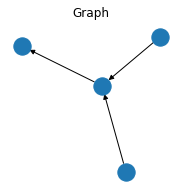

In [12]:
graph_nx = nx.MultiDiGraph()

# Globals.
graph_nx.graph["features"] = np.array([0.6, 0.7, 0.8])

# Nodes.
graph_nx.add_node(0, features=np.array([0.3, 1.3]))
graph_nx.add_node(1, features=np.array([0.4, 1.4]))
graph_nx.add_node(2, features=np.array([0.5, 1.5]))
graph_nx.add_node(3, features=np.array([0.6, 1.6]))
# Edges.
graph_nx.add_edge(0, 1, features=np.array([3.6, 3.7]))
graph_nx.add_edge(2, 0, features=np.array([5.6, 5.7]))
graph_nx.add_edge(3, 0, features=np.array([6.6, 6.7]))

ax = plt.figure(figsize=(3, 3)).gca()
nx.draw(graph_nx, ax=ax)
ax.set_title("Graph")

graphs_tuple = utils_np.networkxs_to_graphs_tuple([graph_nx])

print_graphs_tuple(graphs_tuple)

In [13]:
GLOBAL_SIZE = 4
NODE_SIZE = 5
EDGE_SIZE = 6

def get_graph_data_dict(num_nodes, num_edges):
  '''
  dati il numero di nodi e il numero di archi per ogni grafo, la funzione ritorna un dizionario
  contenente il grafo 
  '''
  return {
      "globals": np.random.rand(GLOBAL_SIZE).astype(np.float32),
      "nodes": np.random.rand(num_nodes, NODE_SIZE).astype(np.float32),
      "edges": np.random.rand(num_edges, EDGE_SIZE).astype(np.float32),
      "senders": np.random.randint(num_nodes, size=num_edges, dtype=np.int32),
      "receivers": np.random.randint(num_nodes, size=num_edges, dtype=np.int32),
  }

graph_3_nodes_4_edges = get_graph_data_dict(num_nodes=3, num_edges=4)
graph_5_nodes_8_edges = get_graph_data_dict(num_nodes=5, num_edges=8)
graph_7_nodes_13_edges = get_graph_data_dict(num_nodes=7, num_edges=13)
graph_9_nodes_25_edges = get_graph_data_dict(num_nodes=9, num_edges=25)


#mettiamo i grafi in una lista

graph_dicts = [graph_3_nodes_4_edges, graph_5_nodes_8_edges,
               graph_7_nodes_13_edges, graph_9_nodes_25_edges]



def plot_graphs_tuple_np(graphs_tuple):
  '''
  data una graphs tuple (insieme di grafi) la funzione plotta tutti i grafi
  '''
  networkx_graphs = utils_np.graphs_tuple_to_networkxs(graphs_tuple)
  num_graphs = len(networkx_graphs)
  _, axes = plt.subplots(1, num_graphs, figsize=(5*num_graphs, 5))
  if num_graphs == 1:
    axes = axes,
  for graph, ax in zip(networkx_graphs, axes):
    plot_graph_networkx(graph, ax)


def plot_graph_networkx(graph, ax, pos=None):

  #mette come node features la prima feature ( se il nodo ha featureas dim , la prima viene presa)
  node_labels = {node: "{:.3g}".format(data["features"][0])
                 for node, data in graph.nodes(data=True)
                 if data["features"] is not None}

  edge_labels = {(sender, receiver): "{:.3g}".format(data["features"][0])
                 for sender, receiver, data in graph.edges(data=True)
                 if data["features"] is not None}
                 
  global_label = ("{:.3g}".format(graph.graph["features"][0])
                  if graph.graph["features"] is not None else None)

  if pos is None:
    pos = nx.spring_layout(graph)
  nx.draw_networkx(graph, pos, ax=ax, labels=node_labels)

  if edge_labels:
    nx.draw_networkx_edge_labels(graph, pos, edge_labels, ax=ax)

  if global_label:
    plt.text(0.05, 0.95, global_label, transform=ax.transAxes)

  ax.yaxis.set_visible(False)
  ax.xaxis.set_visible(False)
  return pos


def plot_compare_graphs(graphs_tuples, labels):
  pos = None
  num_graphs = len(graphs_tuples)
  _, axes = plt.subplots(1, num_graphs, figsize=(5*num_graphs, 5))
  if num_graphs == 1:
    axes = axes,
  pos = None
  for name, graphs_tuple, ax in zip(labels, graphs_tuples, axes):
    graph = utils_np.graphs_tuple_to_networkxs(graphs_tuple)[0]
    pos = plot_graph_networkx(graph, ax, pos=pos)
    ax.set_title(name)

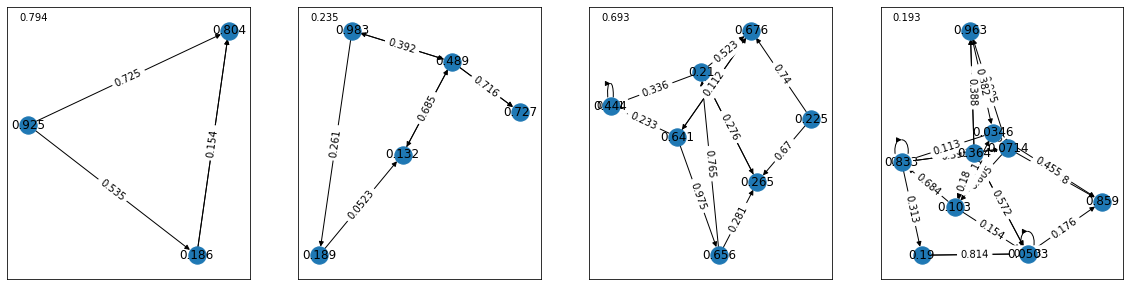

In [14]:
#tf.reset_default_graph()
#tf.compat.v1.reset_default_graph()

#graphs_tuple_tf = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)

#with tf.Session() as sess:
#  graphs_tuple_np = sess.run(graphs_tuple_tf)

#graphs_tuple_np=graphs_tuple_tf
graphs_tuple_np=utils_np.data_dicts_to_graphs_tuple(graph_dicts)

plot_graphs_tuple_np(graphs_tuple_np)

In [15]:
graphs_tuple_np.globals

array([[0.7943394 , 0.28299296, 0.42633945, 0.70407695],
       [0.2348665 , 0.18539867, 0.5627259 , 0.45755962],
       [0.6927378 , 0.85803604, 0.5783172 , 0.45750436],
       [0.19341022, 0.8771462 , 0.56639564, 0.45512223]], dtype=float32)

In [16]:
## crea un graph tuple con numpy array di tensori 
graphs_tuple_tf = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)

# Removing the edges from a graph.
graph_with_nones = graphs_tuple_tf.replace(
    edges=None, senders=None, receivers=None, n_edge=graphs_tuple_tf.n_edge*0)

In [17]:
graphs_tuple_tf.globals

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.7943394 , 0.28299296, 0.42633945, 0.70407695],
       [0.2348665 , 0.18539867, 0.5627259 , 0.45755962],
       [0.6927378 , 0.85803604, 0.5783172 , 0.45750436],
       [0.19341022, 0.8771462 , 0.56639564, 0.45512223]], dtype=float32)>

In [18]:
graphs_tuple_tf.senders

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([ 1,  2,  1,  2,  6,  3,  3,  5,  3,  6,  7,  3, 10, 14, 14,  8, 12,
       12, 11, 14, 11,  9, 11, 13,  8, 16, 21, 18, 15, 15, 20, 23, 18, 20,
       22, 16, 21, 16, 18, 20, 22, 21, 18, 21, 23, 21, 19, 15, 15, 21])>

In [19]:
graph_with_nones.globals

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[0.7943394 , 0.28299296, 0.42633945, 0.70407695],
       [0.2348665 , 0.18539867, 0.5627259 , 0.45755962],
       [0.6927378 , 0.85803604, 0.5783172 , 0.45750436],
       [0.19341022, 0.8771462 , 0.56639564, 0.45512223]], dtype=float32)>

In [20]:
## senders è None e quindi non viene restuito niente
graph_with_nones.senders

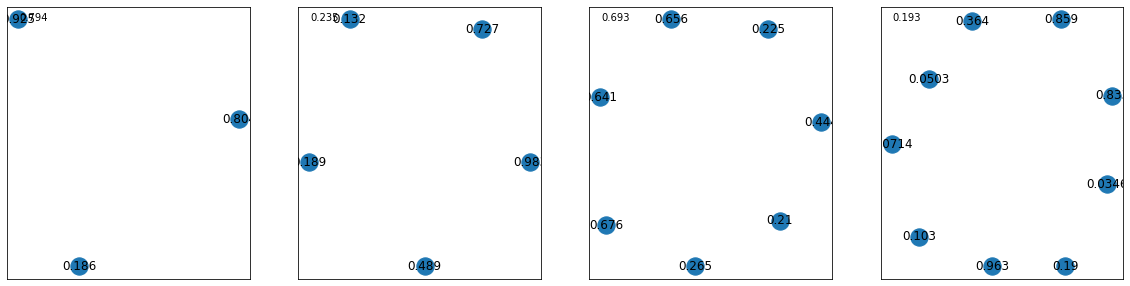

In [21]:
## con tensorflow 1

#runnable_in_session_graph = utils_tf.make_runnable_in_session(graph_with_nones)

#with tf.Session() as sess:
#  graphs_tuple_np = sess.run(runnable_in_session_graph)

#plot_graphs_tuple_np(graphs_tuple_np)

plot_graphs_tuple_np(graph_with_nones)
#runnable_in_session_graph = utils_tf.make_runnable_in_session(graph_with_nones)
#plot_graphs_tuple_np(runnable_in_session_graph)

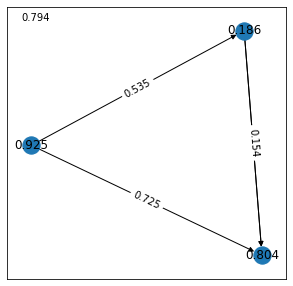

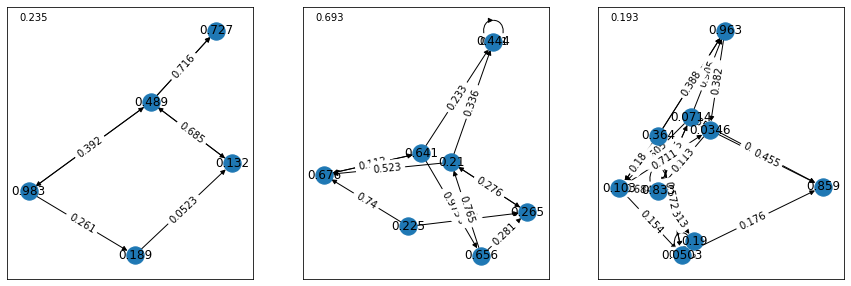

In [22]:
graphs_tuple_np = utils_np.data_dicts_to_graphs_tuple(graph_dicts)

first_graph_np = utils_np.get_graph(graphs_tuple_np, 0)
three_graphs_np = utils_np.get_graph(graphs_tuple_np, slice(1, 4))


plot_graphs_tuple_np(first_graph_np)
plot_graphs_tuple_np(three_graphs_np)



Un graph network ha 3 learnanble sub-function, queste devono essere specificate tramite callables(funzioni,per chiamare un callable si possono mettere delle () dopo la chiamata) che ritornano Sonnet modules.



In [51]:
OUTPUT_EDGE_SIZE = 10
OUTPUT_NODE_SIZE = 11
OUTPUT_GLOBAL_SIZE = 12
graph_network = modules.GraphNetwork(
    edge_model_fn=lambda: snt.Linear(output_size=OUTPUT_EDGE_SIZE),
    node_model_fn=lambda: snt.Linear(output_size=OUTPUT_NODE_SIZE),
    global_model_fn=lambda: snt.Linear(output_size=OUTPUT_GLOBAL_SIZE))

#snt.Linear è un linear module 

In [30]:
graph_network._edge_block._edge_model

Linear(output_size=10)


A GraphsTuple can be fed into a graph network, which returns an output graph with the same number of nodes, edges, and edge connectivity, but with updated edge, node and global features. All of the output features are conditioned on the input features according to the graph structure

In [31]:
input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)
#input_graphs contiene 4 grafi da 3,5,7 e 9 nodi
#input_graphs contiene 4 grafi da 4,8,13,35 edges
output_graphs = graph_network(input_graphs)

In [43]:
print(input_graphs.nodes[0])#5 features per nodo
print(output_graphs.nodes[0])#11 features per nodo


tf.Tensor([0.8038612  0.78892696 0.93745965 0.8540025  0.81194836], shape=(5,), dtype=float32)
tf.Tensor(
[ 0.80052155 -0.36707535  1.6954223  -0.50043064  0.9355595   2.265317
 -0.161022   -0.7305435   1.6348274   1.195209    0.4865526 ], shape=(11,), dtype=float32)


A Graph Net module can be chained recurrently by matching the output feature sizes to the input feature sizes, and feeding the output back to the input multiple times, infatti in questo caso l input graph ha dimensioni 4 global, 5 nodes e 6 edges e quindi il graph network deve avere come output le stesse dimensioni per essere concatenato

perche il graph network inizializza i valori di w e di b in base alle dimensioni degli input, quindi se l'output ha dimensioni diverse e viene ripassato come input allora non è possibile fare la moltiplicazione con w perche ha diversa shape.quindi se si volgiono concatenare piu graph blocks le dimesioni dell'output devono essere le stesse di quelle dell'input 

In [53]:
graph_network_2 = modules.GraphNetwork(
    edge_model_fn=lambda: snt.Linear(output_size=EDGE_SIZE),
    node_model_fn=lambda: snt.Linear(output_size=NODE_SIZE),
    global_model_fn=lambda: snt.Linear(output_size=GLOBAL_SIZE))


num_recurrent_passes = 3
previous_graphs = input_graphs
for unused_pass in range(num_recurrent_passes):
  previous_graphs = graph_network_2(previous_graphs)
output_graphs = previous_graphs

In [54]:
output_graphs.nodes[0]#5 features per nodo

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([ 0.45620212,  0.38055238,  7.270541  ,  3.7653654 , -1.796395  ],
      dtype=float32)>

In [55]:
def zeros_graph(sample_graph, edge_size, node_size, global_size):
  zeros_graphs = sample_graph.replace(nodes=None, edges=None, globals=None)
  zeros_graphs = utils_tf.set_zero_edge_features(zeros_graphs, edge_size)#cambia la dimensione delle features e le mette a 0
  zeros_graphs = utils_tf.set_zero_node_features(zeros_graphs, node_size)
  zeros_graphs = utils_tf.set_zero_global_features(zeros_graphs, global_size)
  return zeros_graphs

In [56]:
graph_network = modules.GraphNetwork(
    edge_model_fn=lambda: snt.Linear(output_size=OUTPUT_EDGE_SIZE),
    node_model_fn=lambda: snt.Linear(output_size=OUTPUT_NODE_SIZE),
    global_model_fn=lambda: snt.Linear(output_size=OUTPUT_GLOBAL_SIZE))

In [58]:
input_graphs

GraphsTuple(nodes=<tf.Tensor: shape=(24, 5), dtype=float32, numpy=
array([[0.8038612 , 0.78892696, 0.93745965, 0.8540025 , 0.81194836],
       [0.18600592, 0.21891463, 0.56188184, 0.74090654, 0.870992  ],
       [0.9253115 , 0.3411899 , 0.87623537, 0.681866  , 0.3445711 ],
       [0.48858717, 0.22915064, 0.70266986, 0.7078837 , 0.01480291],
       [0.726977  , 0.18123072, 0.3615114 , 0.93067855, 0.87937033],
       [0.1888045 , 0.94309074, 0.53197247, 0.8791617 , 0.75510937],
       [0.98309845, 0.8260474 , 0.13349608, 0.28687358, 0.24345466],
       [0.13203529, 0.53239155, 0.24421827, 0.5174129 , 0.18446872],
       [0.22535972, 0.47105104, 0.4479163 , 0.2790106 , 0.3753086 ],
       [0.44413486, 0.58714116, 0.52623963, 0.43076   , 0.07194738],
       [0.2654969 , 0.8464463 , 0.14072877, 0.4705758 , 0.07619627],
       [0.64063925, 0.62623537, 0.3808214 , 0.43202835, 0.5273623 ],
       [0.65575266, 0.53874284, 0.99341536, 0.4274151 , 0.44592676],
       [0.67563224, 0.5594235 , 0.59

In [59]:
initial_state = zeros_graph(
    input_graphs, OUTPUT_EDGE_SIZE, OUTPUT_NODE_SIZE, OUTPUT_GLOBAL_SIZE)

In [60]:
initial_state

GraphsTuple(nodes=<tf.Tensor: shape=(24, 11), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.,

In [63]:
#we can process the input graph multiple times with a graph state that gets updated recurrently
num_recurrent_passes = 3

current_state = initial_state
for unused_pass in range(num_recurrent_passes):
  input_and_state_graphs = utils_tf.concat(
      [input_graphs, current_state], axis=1)
      #entra 5+11 features
  current_state = graph_network(input_and_state_graphs)
  #esce 11 features
output_graphs = current_state

In [65]:
output_graphs.nodes[0]

<tf.Tensor: shape=(11,), dtype=float32, numpy=
array([-1.3503662 ,  0.43257615, -0.02062991,  2.1755064 ,  0.13379957,
        0.2402927 , -0.6010166 , -1.1742156 , -1.5662144 , -1.6513442 ,
        0.06147545], dtype=float32)>

Custom graph net modules can be built using a few basic building blocks provided in graph_nets.blocks.

In [67]:
data_dict_0

{'globals': [1.0, 2.0, 3.0],
 'nodes': [[10.0, 20.0, 30.0],
  [11.0, 21.0, 31.0],
  [12.0, 22.0, 32.0],
  [13.0, 23.0, 33.0],
  [14.0, 24.0, 34.0]],
 'edges': [[100.0, 200.0],
  [101.0, 201.0],
  [102.0, 202.0],
  [103.0, 203.0],
  [104.0, 204.0],
  [105.0, 205.0]],
 'senders': [0, 1, 1, 2, 2, 3],
 'receivers': [1, 2, 3, 0, 3, 4]}

In [66]:
graphs_tuple = utils_tf.data_dicts_to_graphs_tuple([data_dict_0])
updated_broadcast_globals_to_nodes = graphs_tuple.replace(
    nodes=blocks.broadcast_globals_to_nodes(graphs_tuple))#mette le global features al posto delle features dei nodi
updated_broadcast_globals_to_edges = graphs_tuple.replace(
    edges=blocks.broadcast_globals_to_edges(graphs_tuple))#mette le global features al posto delle features degli edges
updated_broadcast_sender_nodes_to_edges = graphs_tuple.replace(
    edges=blocks.broadcast_sender_nodes_to_edges(graphs_tuple))#mette come features degli archi le features dei nodi senders
updated_broadcast_receiver_nodes_to_edges = graphs_tuple.replace(
    edges=blocks.broadcast_receiver_nodes_to_edges(graphs_tuple))#mette come features degli archi le features dei nodi receivers

In [68]:
graphs_tuple

GraphsTuple(nodes=<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[10., 20., 30.],
       [11., 21., 31.],
       [12., 22., 32.],
       [13., 23., 33.],
       [14., 24., 34.]], dtype=float32)>, edges=<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[100., 200.],
       [101., 201.],
       [102., 202.],
       [103., 203.],
       [104., 204.],
       [105., 205.]], dtype=float32)>, receivers=<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 0, 3, 4])>, senders=<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 1, 1, 2, 2, 3])>, globals=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>, n_node=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([5])>, n_edge=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([6])>)

In [69]:
updated_broadcast_globals_to_nodes

GraphsTuple(nodes=<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]], dtype=float32)>, edges=<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[100., 200.],
       [101., 201.],
       [102., 202.],
       [103., 203.],
       [104., 204.],
       [105., 205.]], dtype=float32)>, receivers=<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 0, 3, 4])>, senders=<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 1, 1, 2, 2, 3])>, globals=<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>, n_node=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([5])>, n_edge=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([6])>)

In [74]:
output_graphs = [
      graphs_tuple,
      updated_broadcast_globals_to_nodes,
      updated_broadcast_globals_to_edges,
      updated_broadcast_sender_nodes_to_edges,
      updated_broadcast_receiver_nodes_to_edges]

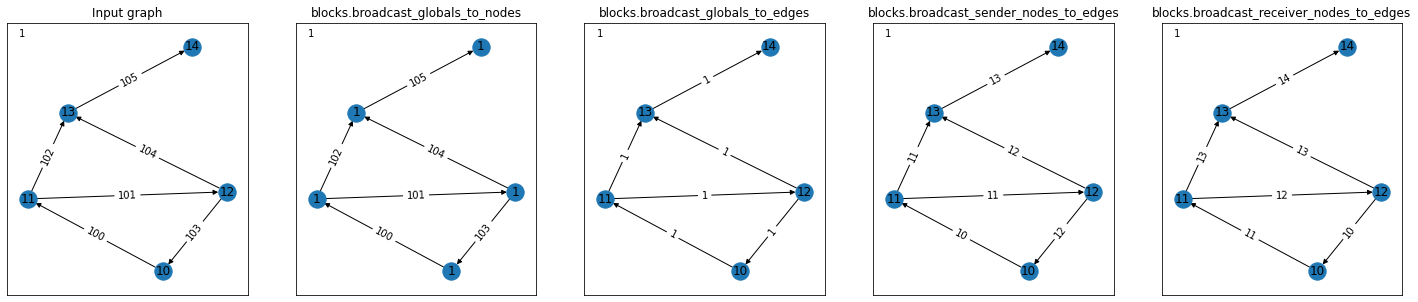

In [75]:
plot_compare_graphs(output_graphs, labels=[
    "Input graph",
    "blocks.broadcast_globals_to_nodes",
    "blocks.broadcast_globals_to_edges",
    "blocks.broadcast_sender_nodes_to_edges",
    "blocks.broadcast_receiver_nodes_to_edges"])

We can easily use broadcasters to, for example, set the value of each edge to be the sum of the first feature element of: the input edges, the sender nodes, the receiver nodes, and the global feature.

In [76]:
updated_graphs_tuple = graphs_tuple.replace(
    edges=(graphs_tuple.edges[:, :1] + 
           blocks.broadcast_receiver_nodes_to_edges(graphs_tuple)[:, :1] +
           blocks.broadcast_sender_nodes_to_edges(graphs_tuple)[:, :1] +
           blocks.broadcast_globals_to_edges(graphs_tuple)[:, :1]))

In [77]:
output_graphs = [graphs_tuple,updated_graphs_tuple]

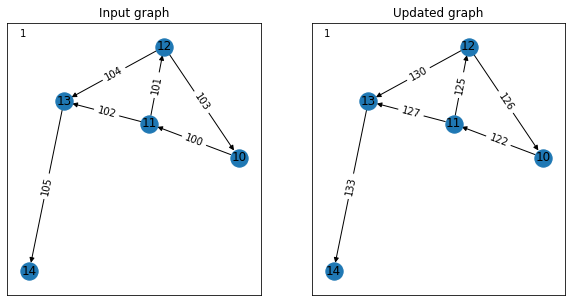

In [79]:
plot_compare_graphs(output_graphs, labels=[
    "Input graph",
    "Updated graph"])

# es input features 105
# output 105+13+14+1

In [81]:
reducer = tf.math.unsorted_segment_sum
#le global features vengono settate alla somma delle features di tutti gli archi
#cambia anche la dimensione , ogni archi ha 2 features quindi le globals saranno due features
updated_edges_to_globals = graphs_tuple.replace(
    globals=blocks.EdgesToGlobalsAggregator(reducer=reducer)(graphs_tuple))
#le global features vengono settate alla somma delle features di tutti i nodi 
# cambia anche la dimensione, ogni nodo ha 3 features quindi le globals saranno tre features 
updated_nodes_to_globals = graphs_tuple.replace(
    globals=blocks.NodesToGlobalsAggregator(reducer=reducer)(graphs_tuple))
updated_sent_edges_to_nodes = graphs_tuple.replace(
    nodes=blocks.SentEdgesToNodesAggregator(reducer=reducer)(graphs_tuple))
updated_received_edges_to_nodes = graphs_tuple.replace(
    nodes=blocks.ReceivedEdgesToNodesAggregator(reducer=reducer)(graphs_tuple))


In [87]:
updated_edges_to_globals

GraphsTuple(nodes=<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[10., 20., 30.],
       [11., 21., 31.],
       [12., 22., 32.],
       [13., 23., 33.],
       [14., 24., 34.]], dtype=float32)>, edges=<tf.Tensor: shape=(6, 2), dtype=float32, numpy=
array([[100., 200.],
       [101., 201.],
       [102., 202.],
       [103., 203.],
       [104., 204.],
       [105., 205.]], dtype=float32)>, receivers=<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 2, 3, 0, 3, 4])>, senders=<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 1, 1, 2, 2, 3])>, globals=<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 615., 1215.]], dtype=float32)>, n_node=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([5])>, n_edge=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([6])>)

In [88]:
output_graphs = [
      graphs_tuple,
      updated_edges_to_globals,
      updated_nodes_to_globals,
      updated_sent_edges_to_nodes,
      updated_received_edges_to_nodes]

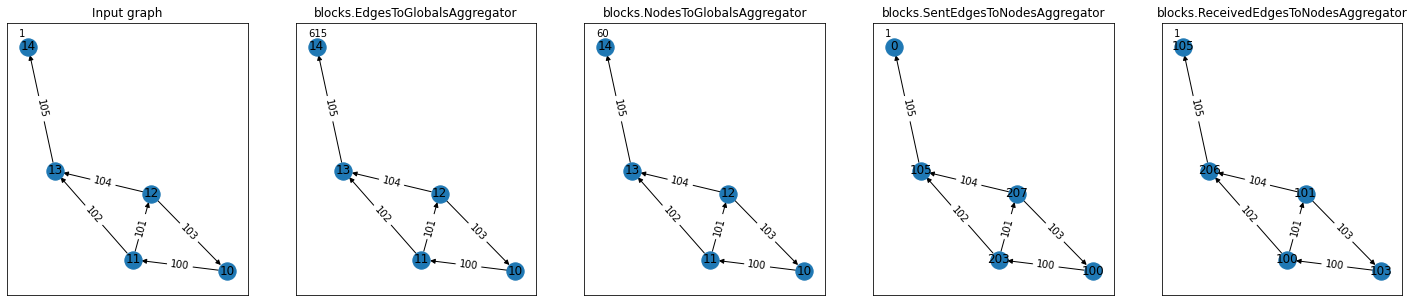

In [90]:
plot_compare_graphs(output_graphs, labels=[
    "Input graph",
    "blocks.EdgesToGlobalsAggregator",
    "blocks.NodesToGlobalsAggregator",
    "blocks.SentEdgesToNodesAggregator",
    "blocks.ReceivedEdgesToNodesAggregator"])
# es nel quarto grafo i nodi assumono la somma delle features degli archi uscenti
# quindi un nodo ha feature 0 perche non ha archi uscenti


#### blocks.EdgeBlock
An EdgeBlock consists of applying a function to the concatenation of:

* graphs_tuple.edges
* blocks.broadcast_sender_nodes_to_edges(graphs_tuple)
* blocks.broadcast_receiver_nodes_to_edges(graphs_tuple)
* blocks.broadcast_globals_to_edges(graphs_tuple)
The result is a graph with new edge features conditioned on input edges, nodes and global features according to the graph structure.

In [91]:
edge_block = blocks.EdgeBlock(
    edge_model_fn=lambda: snt.Linear(output_size=10))

input_graphs = utils_tf.data_dicts_to_graphs_tuple(graph_dicts)
output_graphs = edge_block(input_graphs)

print(("Output edges size: {}".format(output_graphs.edges.shape[-1])))

Output edges size: 10


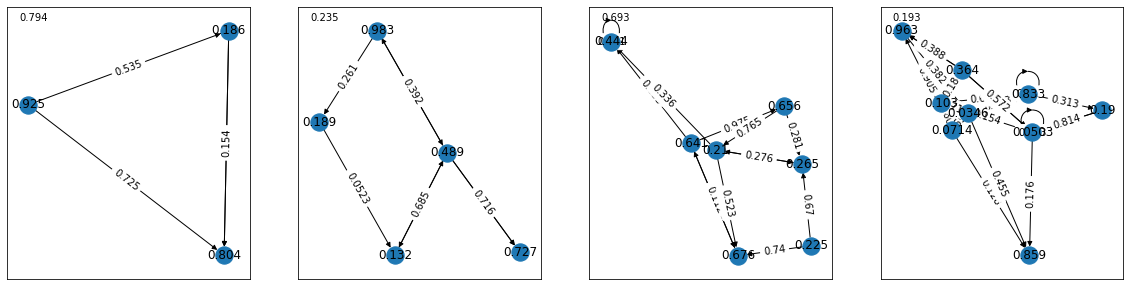

In [93]:
plot_graphs_tuple_np(input_graphs)

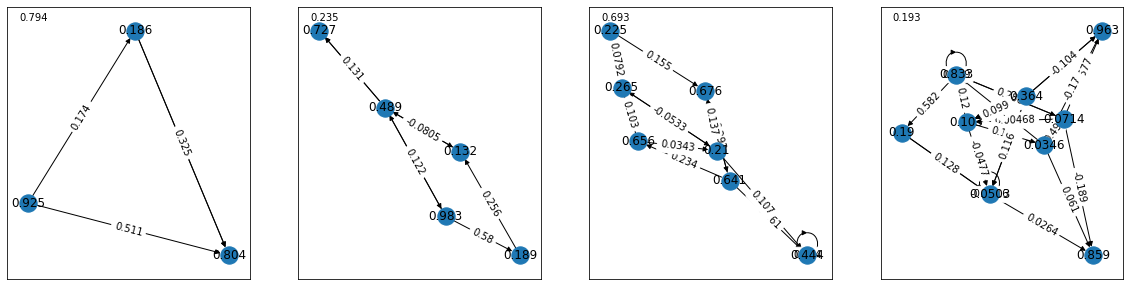

In [94]:
plot_graphs_tuple_np(output_graphs)

#### node.NodeBlock

An NodeBlock consists of applying a function to the concatenation of:

* graphs_tuple.nodes
* blocks.SentEdgesToNodesAggregator( reducer-function )(graphs_tuple)
* blocks.ReceivedEdgesToNodesAggregator( reducer-function )(graphs_tuple)
* blocks.broadcast_globals_to_nodes(graphs_tuple)
The result is a graph with new node features conditioned on input edges, nodes and global features according to the graph structure.

In [95]:
# la reducer-function di defaul è la somma
node_block = blocks.NodeBlock(
    node_model_fn=lambda: snt.Linear(output_size=15))

output_graphs = node_block(input_graphs)

print(("Output nodes size: {}".format(output_graphs.nodes.shape[-1])))

Output nodes size: 15


#### node.GlobalBlock

An GlobalBlock consists of applying a function to the concatenation of:

* graphs_tuple.globals
* blocks.EdgesToGlobalsAggregator( reducer-function )(graphs_tuple)
* blocks.NodesToGlobalsAggregator( reducer-function )(graphs_tuple)
The result is a graph with new globals features conditioned on input edges, nodes and global features.

In [96]:
global_block = blocks.GlobalBlock(
    global_model_fn=lambda: snt.Linear(output_size=20))

output_graphs = global_block(input_graphs)

print(("Output globals size: {}".format(output_graphs.globals.shape[-1])))

Output globals size: 20


A modules.GraphNetwork is composed internally of a modules.EdgeBlock, a modules.NodeBlock, and a modules.GlobalBlock, connected serially. This allows every field in the output to be conditioned by any field in the input.

In [98]:
graph_network = modules.GraphNetwork(
    edge_model_fn=lambda: snt.Linear(output_size=10),#edge block
    node_model_fn=lambda: snt.Linear(output_size=15),#node block
    global_model_fn=lambda: snt.Linear(output_size=20))#global block


output_graphs = graph_network(input_graphs)

for var in graph_network.variables:
  print(var.name)

graph_network/edge_block/linear/b:0
graph_network/edge_block/linear/w:0
graph_network/global_block/linear/b:0
graph_network/global_block/linear/w:0
graph_network/node_block/linear/b:0
graph_network/node_block/linear/w:0
